In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load dataset
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#drop car_name column
df.drop('Car_Name',axis=1,inplace=True)
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#convert categorical to numerical
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,company_hero,company_honda,company_hyndai,company_maruti suzuki,company_other,company_toyota,company_tvs,company_yamaha,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,True,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,True,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,True,False,False,False,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,True,False,False,False,False,True,False,False,True


In [5]:
from re import X
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
#train ml model(random forest)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',
    max_depth=None,
)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [12]:
#evaluate  model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=model.predict(X_test)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))


mean_absolute_error: 0.6084131147540974
mean_squared_error: 0.8595348692622939
r2_score: 0.9626866481940062


In [33]:

def predict_car_price(year, present_price, kms_driven, owner, company, fuel_type, seller_type, transmission):

    input_data_raw = pd.DataFrame({
        'Year': [year],
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Owner': [owner],
        'company': [company],
        'Fuel_Type': [fuel_type],
        'Seller_Type': [seller_type],
        'Transmission': [transmission]
    })

    input_data_encoded = pd.get_dummies(input_data_raw, drop_first=True, columns=['company', 'Fuel_Type', 'Seller_Type', 'Transmission'])


    input_data_final = input_data_encoded.reindex(columns=X.columns, fill_value=0)


    prediction = model.predict(input_data_final)
    return prediction[0]

In [34]:
price=predict_car_price(
    year=2015,
    present_price=8.0,
    kms_driven=1000000,
    owner=0,
    company='Maruti',
    fuel_type='Petrol',
    seller_type='Individual',
    transmission='Manual'

)
print("predicted selling price:",price)

predicted selling price: 5.538


In [36]:
#install & import SHAP
!pip install shap
import shap
shap.initjs()

In [37]:
#create SHAP explainer
explainer=shap.TreeExplainer(model)



In [38]:
#calculate shap values
shap_values=explainer.shap_values(X_train)

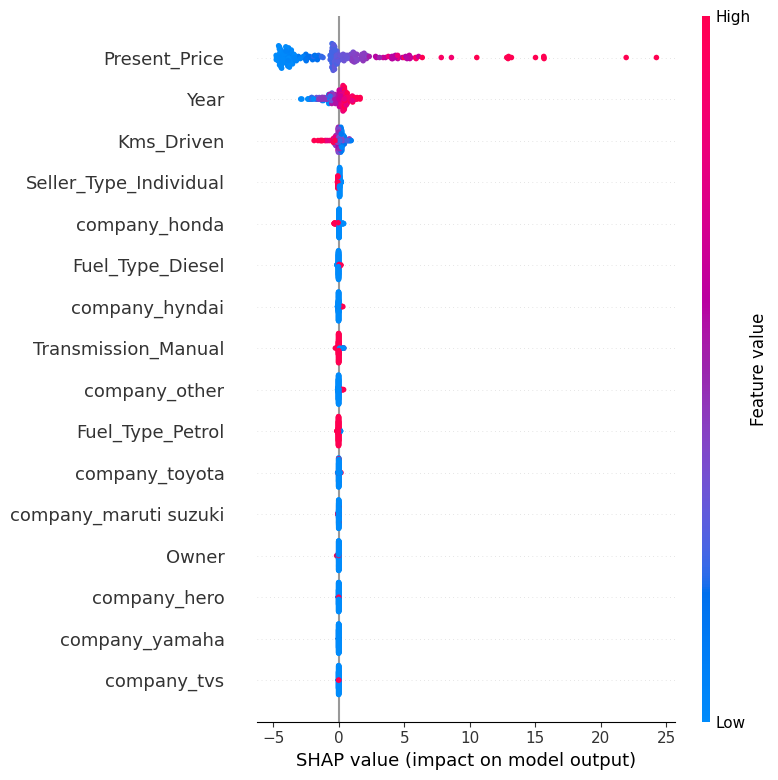

In [39]:
#global explanation
shap.summary_plot(shap_values,X_train)

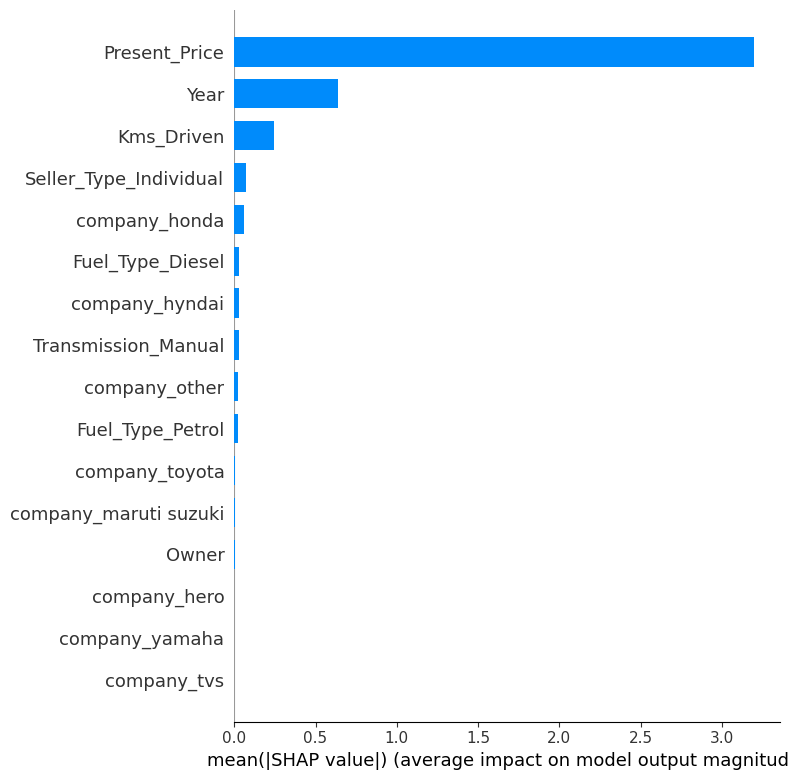

In [41]:
#bar plot
shap.summary_plot(shap_values,X_train,plot_type='bar')

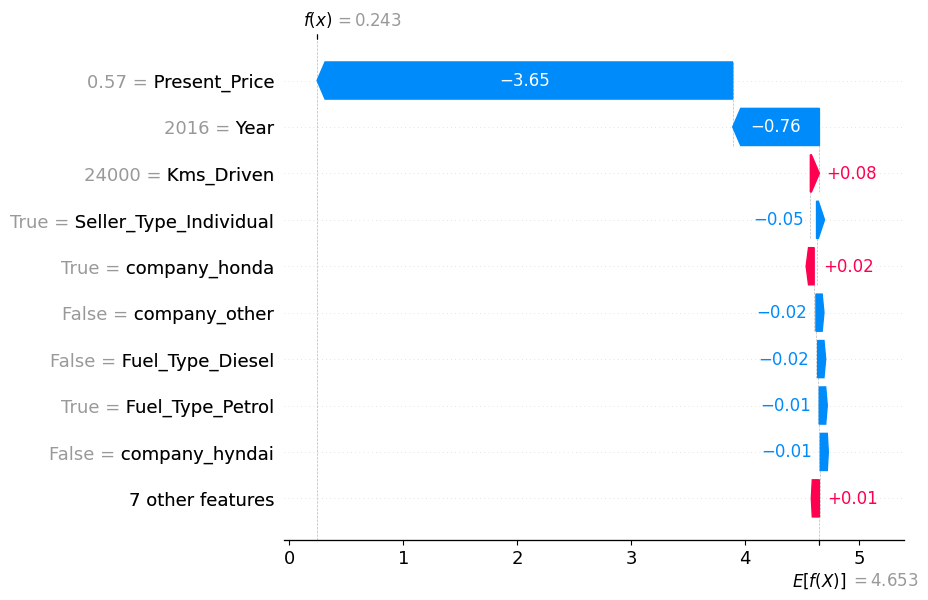

In [43]:
#waterfall plot
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_test.iloc[0],
        feature_names=X_train.columns
    )
)